### importing required liberaries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load the Dataset

In [4]:
data = sns.load_dataset("taxis")

In [5]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


## EDA - Exploratory Data Analysis

In [7]:
data.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [8]:
data.size

90062

In [9]:
data.shape

(6433, 14)

In [10]:
data.index

RangeIndex(start=0, stop=6433, step=1)

### Information about the data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

### Descriptive Statistics 

In [15]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
pickup,6433,2019-03-16 08:31:28.514223616,2019-02-28 23:29:03,2019-03-08 15:50:34,2019-03-15 21:46:58,2019-03-23 17:41:38,2019-03-31 23:43:45,NaN
dropoff,6433,2019-03-16 08:45:49.491217408,2019-02-28 23:32:35,2019-03-08 16:12:51,2019-03-15 22:06:44,2019-03-23 17:51:56,2019-04-01 00:13:58,NaN
passengers,6433.0,1.539251,0.0,1.0,1.0,2.0,6.0,1.203768
distance,6433.0,3.024617,0.0,0.98,1.64,3.21,36.7,3.827867
fare,6433.0,13.091073,1.0,6.5,9.5,15.0,150.0,11.551804
tip,6433.0,1.97922,0.0,0.0,1.7,2.8,33.2,2.44856
tolls,6433.0,0.325273,0.0,0.0,0.0,0.0,24.02,1.415267
total,6433.0,18.517794,1.3,10.8,14.16,20.3,174.82,13.81557


In [16]:
data.describe(include=object)

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


### Correlation

In [26]:
data.corr(numeric_only=True)

,passengers,distance,fare,tip,tolls,total
passengers,1.000000,0.009411,0.007637,0.021099,-0.002903,0.015708
distance,0.009411,1.000000,0.920108,0.452589,0.635267,0.904676
fare,0.007637,0.920108,1.000000,0.488612,0.609307,0.974358
tip,0.021099,0.452589,0.488612,1.000000,0.413619,0.646186
tolls,-0.002903,0.635267,0.609307,0.413619,1.000000,0.683142
total,0.015708,0.904676,0.974358,0.646186,0.683142,1.000000


## Data Cleaning And Preprosessing 

#### Missing value detection

In [30]:
data.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [31]:
data.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

#### Duplicate row 

In [34]:
data.duplicated().sum()

0

- there are no duplicate row in this data

### Analysis of categorical data 

In [39]:
data['color'].unique()

array(['yellow', 'green'], dtype=object)

In [40]:
data['color'].nunique()

2

In [41]:
data['color'].value_counts()

color
yellow    5451
green      982
Name: count, dtype: int64

In [42]:
data['payment'].value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

In [44]:
data['pickup_zone'].value_counts().head(10)

pickup_zone
Midtown Center                  230
Upper East Side South           211
Penn Station/Madison Sq West    210
Clinton East                    208
Midtown East                    198
Upper East Side North           186
Times Sq/Theatre District       184
Union Sq                        180
Lincoln Square East             177
Murray Hill                     162
Name: count, dtype: int64

# Data Preprocessing and modifications 

In [50]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [52]:
data['pickup_hour'] = data['pickup'].dt.hour
data['pickup_day'] = data['pickup'].dt.day
data['Pickup_weekday'] = data['pickup'].dt.day_name()
data['Duration'] = ( data['dropoff'] - data['pickup']).dt.total_seconds()/60

In [53]:
data.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,Pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,4,Monday,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,27,Wednesday,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,10,Sunday,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,30,Saturday,9.533333


# Let's Start with Visualizaing the data 

### 1. pairplot - correlation matrix graph - for all data


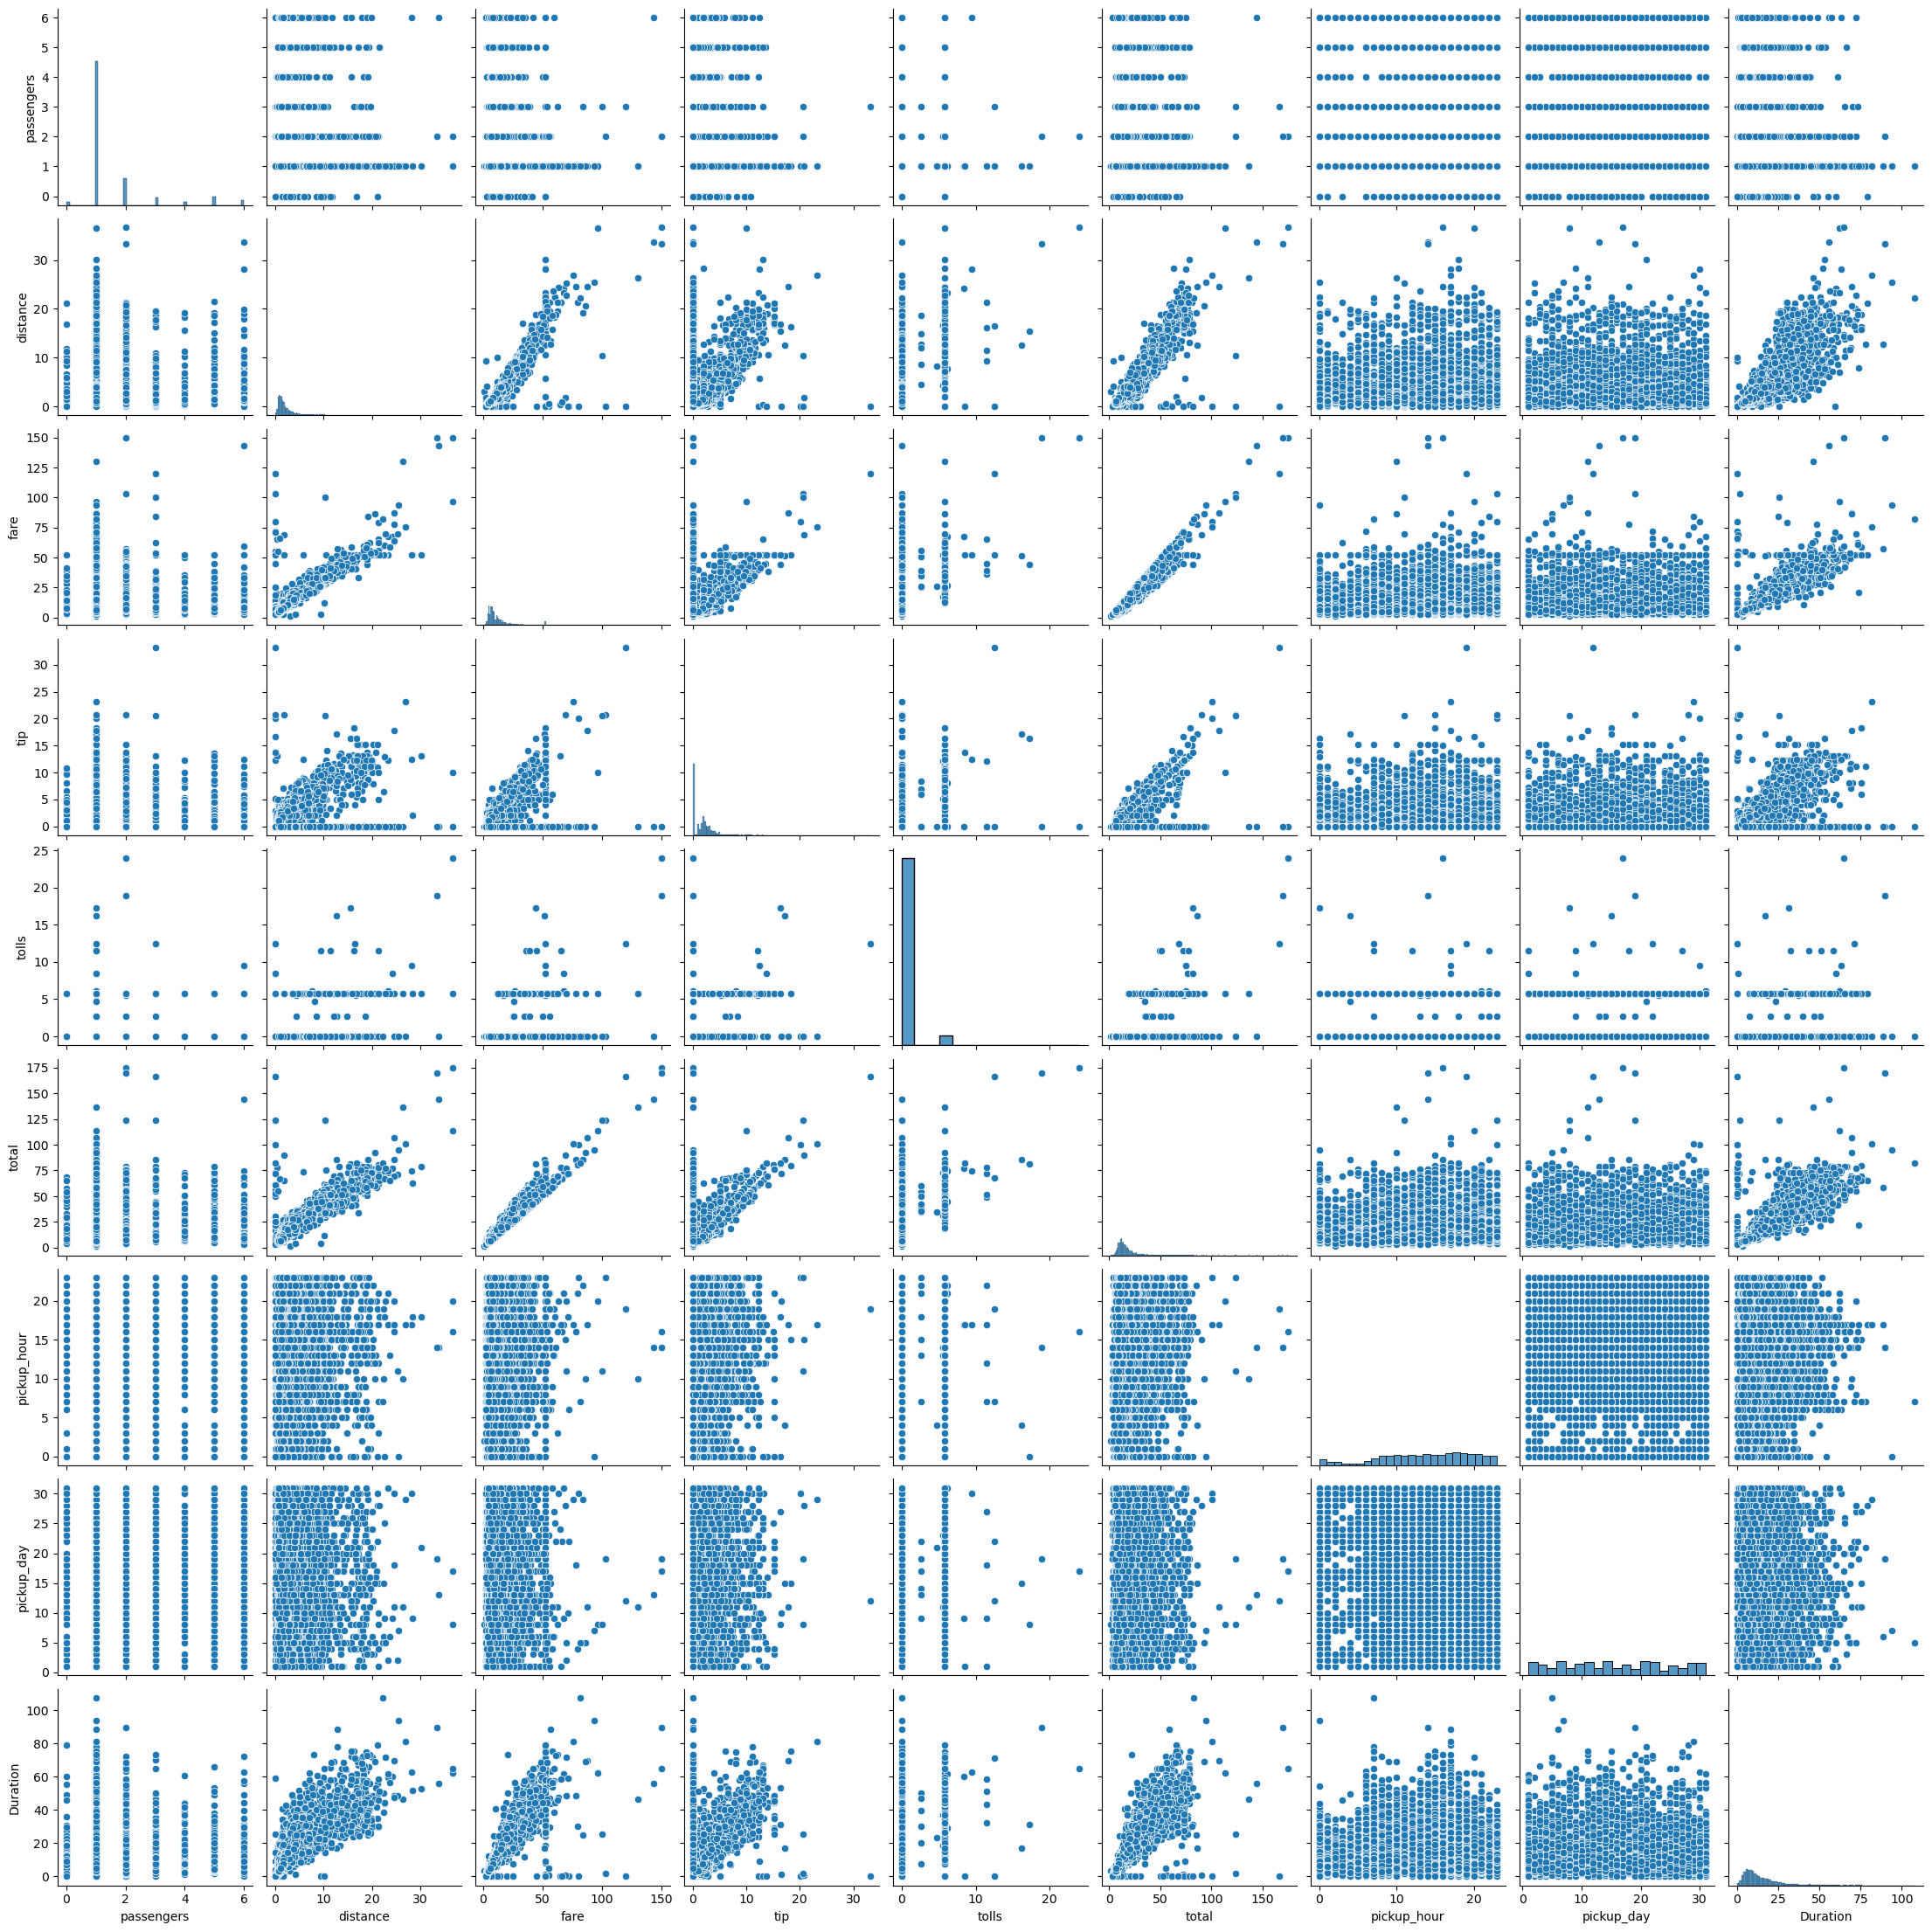

In [58]:
sns.pairplot(data)
plt.show()

### 2. Heatmap (used to visualize Pearson's correlation matrix)

In [61]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [62]:
corr = data.corr(numeric_only=True)

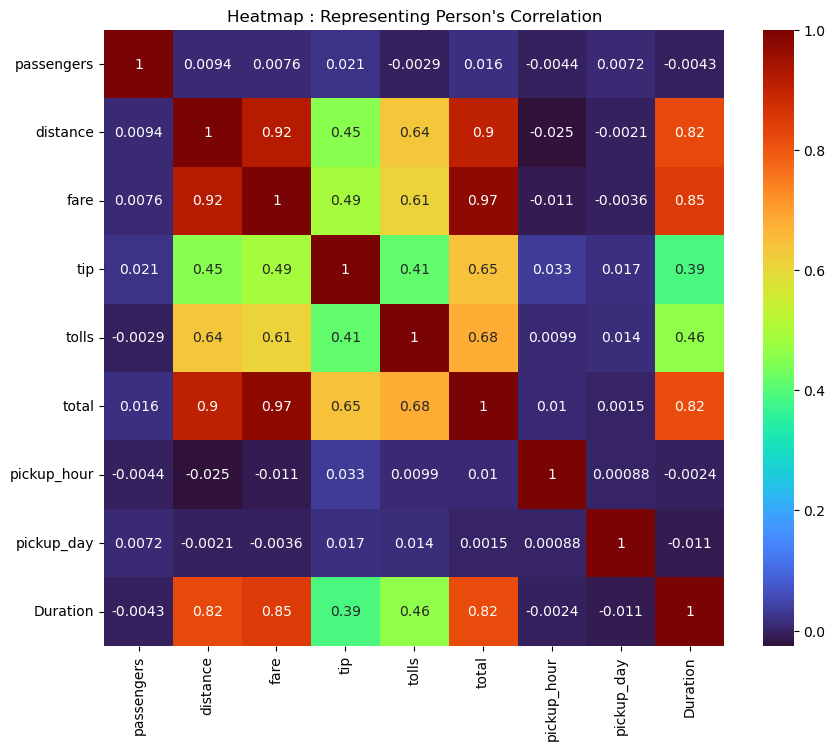

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap="turbo")
plt.title("Heatmap : Representing Person's Correlation")
plt.show()

## 3. Scatter Plot
**Purpose:** Used to visualize relationships between two numerical variables.

In [65]:
data.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,Pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.25


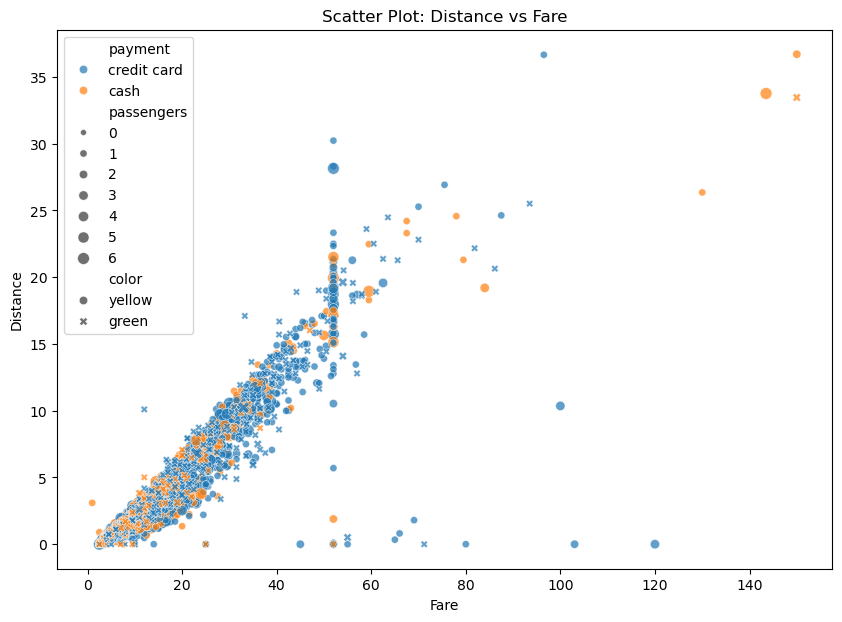

In [66]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='fare', y='distance', data=data, hue="payment",alpha = 0.7,size="passengers",style="color")
plt.title('Scatter Plot: Distance vs Fare')
plt.xlabel("Fare")
plt.ylabel("Distance")
plt.show()

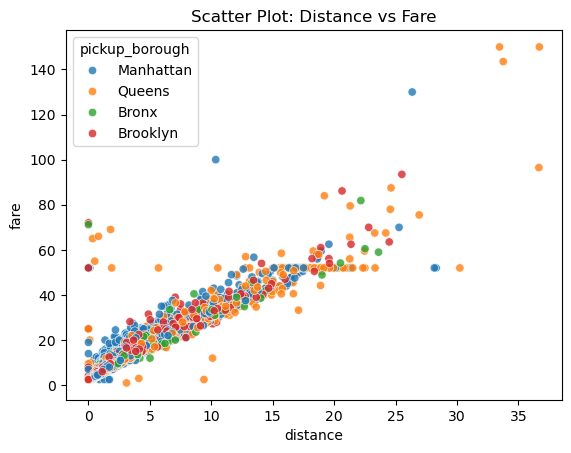

In [67]:
sns.scatterplot(x='distance', y='fare', data=data,hue='pickup_borough',alpha=0.8)
plt.title('Scatter Plot: Distance vs Fare')
plt.show()

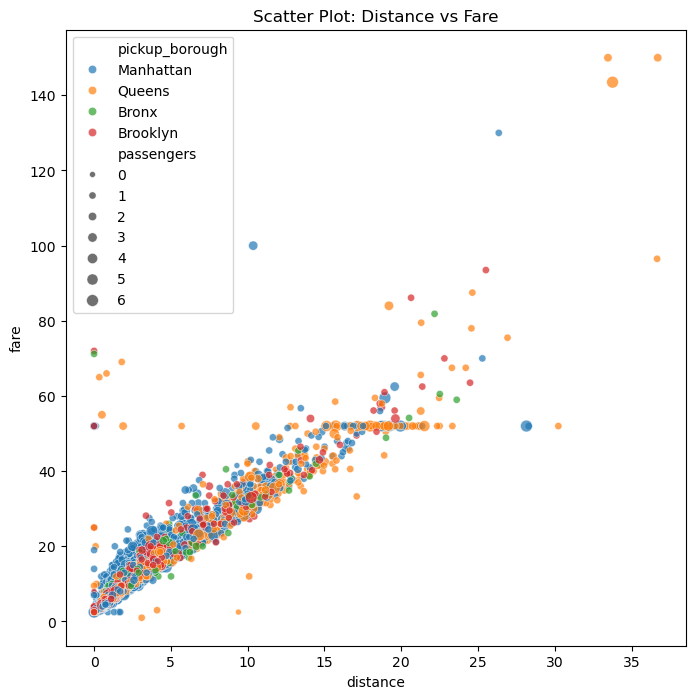

In [68]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='distance', y='fare', data=data,hue='pickup_borough',size="passengers",alpha=0.7)
plt.title('Scatter Plot: Distance vs Fare')
plt.show()

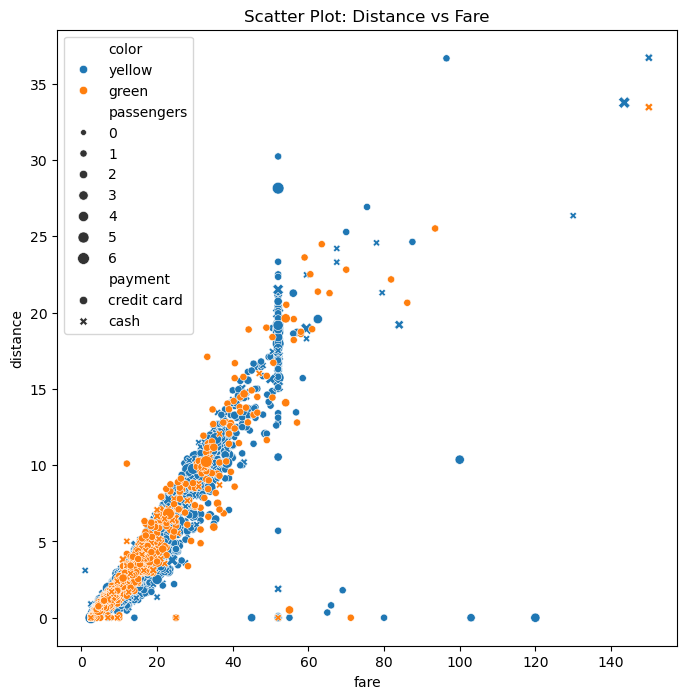

In [69]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='fare', y='distance', data=data,hue='color',size='passengers',style='payment')
plt.title('Scatter Plot: Distance vs Fare')
plt.show()

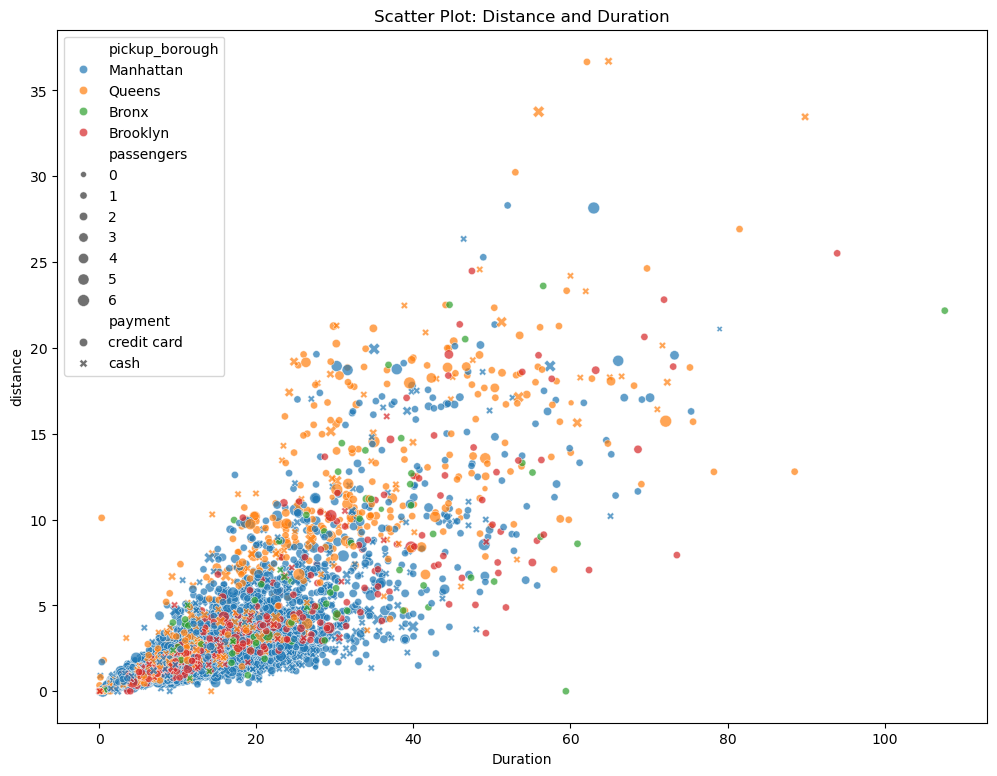

In [70]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='Duration', y='distance', data=data,hue="pickup_borough",size='passengers',style='payment',alpha=0.7)
plt.title('Scatter Plot: Distance and Duration')
plt.show()

### 🔹 Customization Options
- `hue`: Color points based on a category
- `size`: Change point sizes based on a variable
- `style`: Different marker styles for categories

## Pie Chart

In [73]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,Pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,4,Monday,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,27,Wednesday,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,10,Sunday,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,30,Saturday,9.533333


In [74]:
car = data.groupby("color")['fare'].sum()

In [75]:
car

color
green     13788.15
yellow    70426.72
Name: fare, dtype: float64

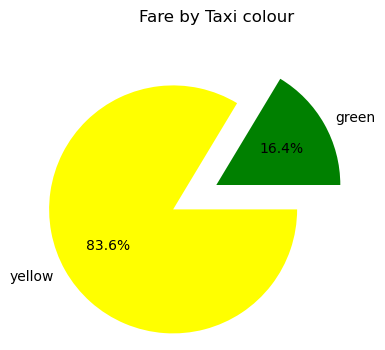

In [76]:
plt.figure(figsize=(4,5))
plt.pie(car , labels = car.index , colors=['green','yellow'],autopct = "%1.1f%%",explode=[0,0.4] )
plt.title("Fare by Taxi colour")
plt.show()

In [77]:
tip = data.groupby('pickup_borough')['tip'].mean()

In [78]:
tip

pickup_borough
Bronx        0.148586
Brooklyn     0.966345
Manhattan    1.939550
Queens       3.040061
Name: tip, dtype: float64

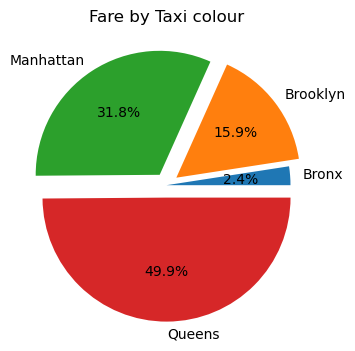

In [79]:
plt.figure(figsize=(4,5))
plt.pie(tip , labels = tip.index ,autopct = "%1.1f%%",explode=[0,0.1,0.1,0.1] )
plt.title("Fare by Taxi colour")
plt.show()

In [80]:
tip = data.groupby('Pickup_weekday')['tip'].sum()

In [81]:
tip

Pickup_weekday
Friday       2207.82
Monday       1435.34
Saturday     1898.64
Sunday       1656.76
Thursday     1866.27
Tuesday      1651.13
Wednesday    2016.36
Name: tip, dtype: float64

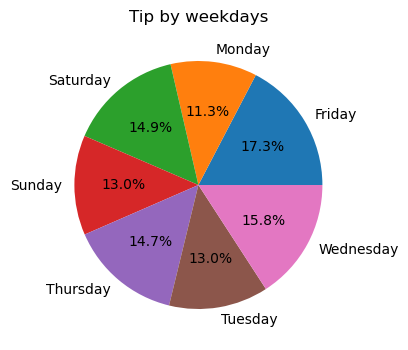

In [82]:
plt.figure(figsize=(4,5))
plt.pie(tip , labels = tip.index ,autopct = "%1.1f%%" )
plt.title("Tip by weekdays")
plt.show()

## 3. Line Plot
**Purpose:** Used to show trends over time.

In [84]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,Pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,4,Monday,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,27,Wednesday,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,10,Sunday,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,30,Saturday,9.533333


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_24620\990486760.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Pickup_weekday', y='tip', data=data,ci=False ,markers="o")


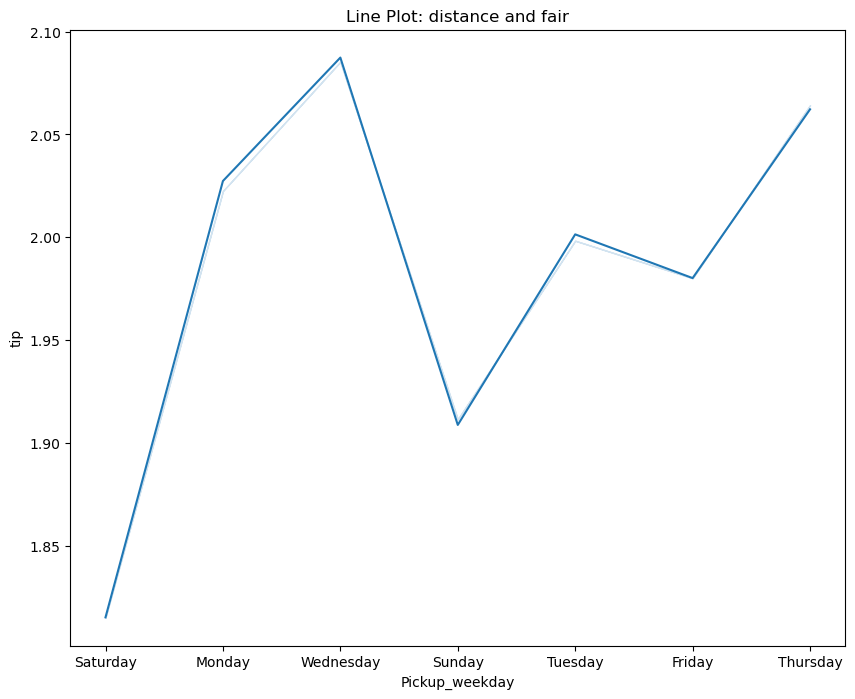

In [85]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Pickup_weekday', y='tip', data=data,ci=False ,markers="o")
plt.title('Line Plot: distance and fair')
plt.show()

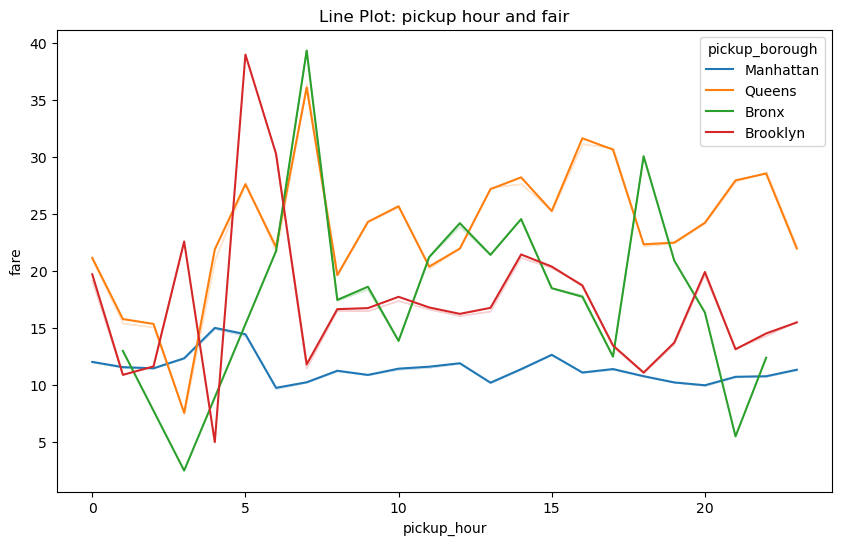

In [86]:
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_hour', y='fare', data=data, errorbar=('ci',False) , markers ="o" , hue= "pickup_borough")
plt.title('Line Plot: pickup hour and fair')
plt.show()

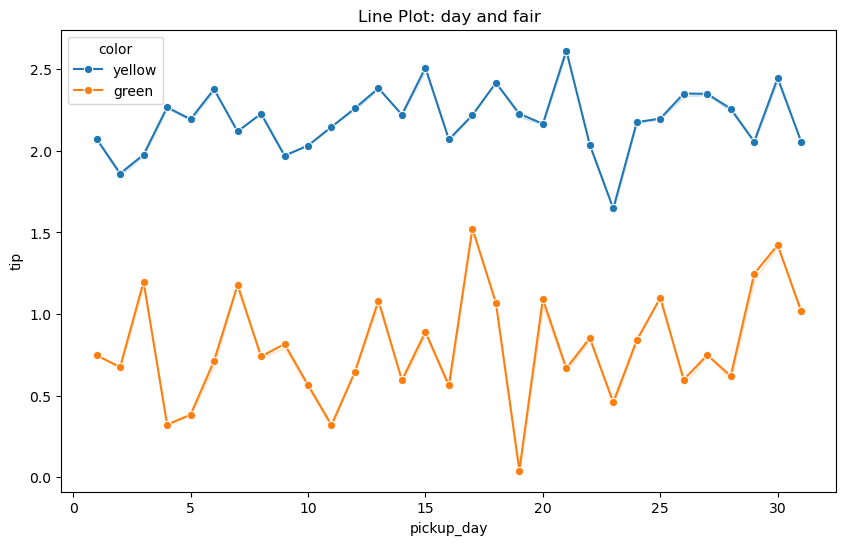

In [87]:
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_day', y='tip', data=data,errorbar=('ci',False),marker="o",hue='color')
plt.title('Line Plot: day and fair')
plt.show()

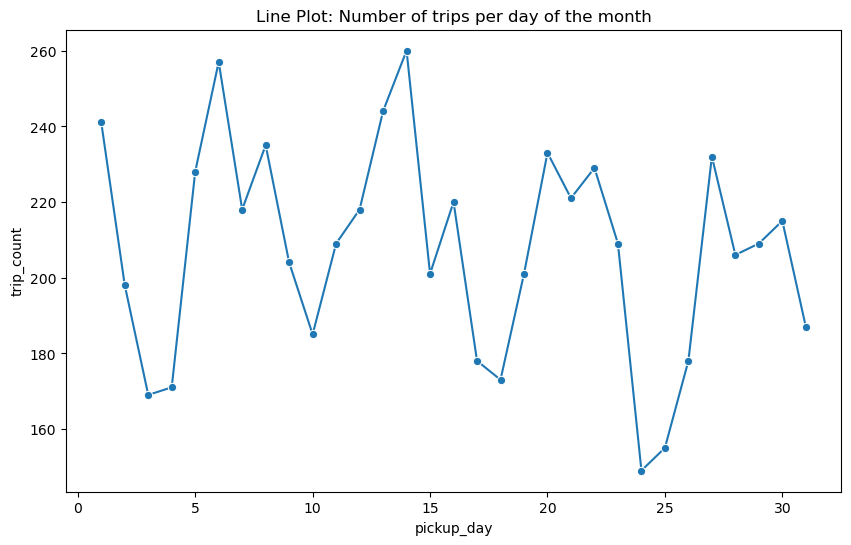

In [88]:
trips_per_day = data.groupby('pickup_day').size().reset_index(name ='trip_count')

plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_day', y='trip_count', data=trips_per_day, marker='o')
plt.title('Line Plot: Number of trips per day of the month')
plt.show()

In [89]:
data.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,Pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.25


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_24620\866195249.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Pickup_weekday', y='fare', data=data,ci=False,marker="o",hue="pickup_borough")


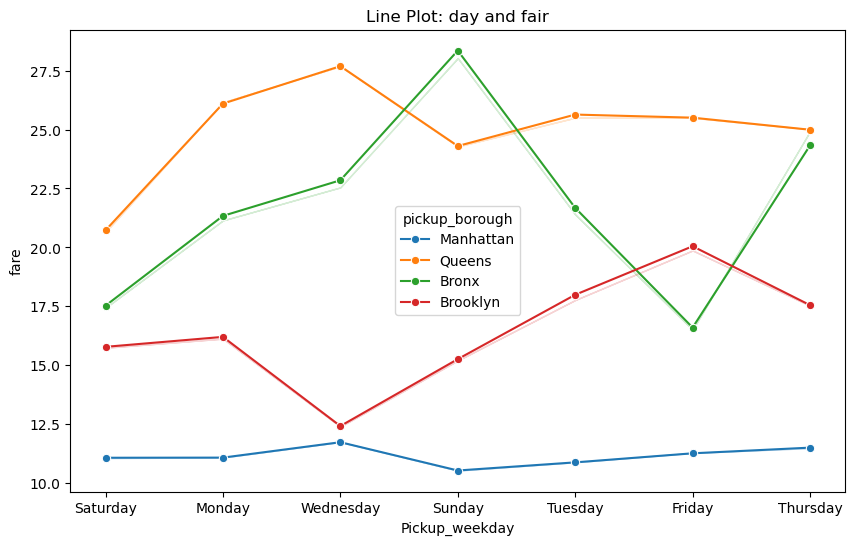

In [90]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Pickup_weekday', y='fare', data=data,ci=False,marker="o",hue="pickup_borough")
plt.title('Line Plot: day and fair')
plt.show()

In [91]:
tip = data.groupby("Pickup_weekday")['tip'].sum()
tip = pd.DataFrame(tip)


In [92]:
tip

,tip
Pickup_weekday,
Friday,2207.82
Monday,1435.34
Saturday,1898.64
Sunday,1656.76
Thursday,1866.27
Tuesday,1651.13
Wednesday,2016.36


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_24620\2093508540.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Pickup_weekday", y="tip", data=tip,ci=False,marker="o")


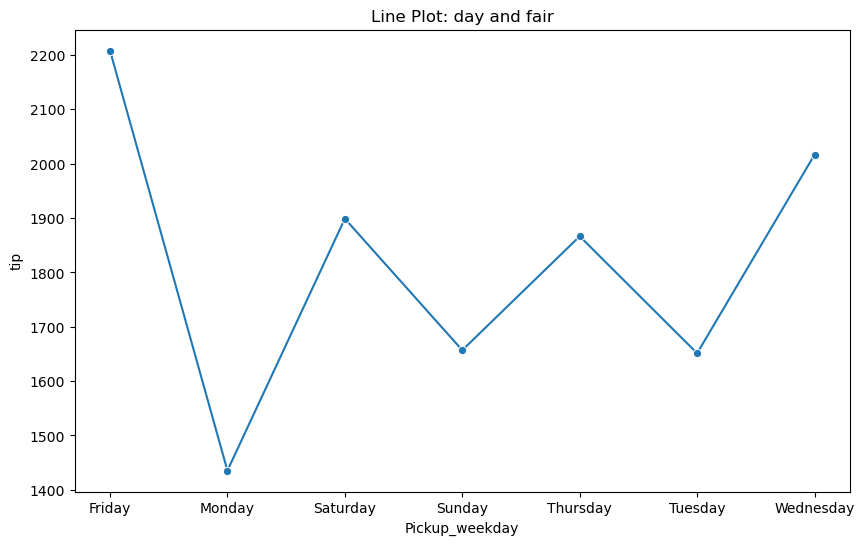

In [93]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Pickup_weekday", y="tip", data=tip,ci=False,marker="o")
plt.title('Line Plot: day and fair')
plt.show()

### 🔹 Customization Options
- `hue`: Different colors for categories
- `markers`: Markers at data points
- `dashes`: Different line styles



In [95]:
# average tip by weekdays 

## 3️⃣ Bar Plot
**Purpose:** Used to compare categorical data.

In [97]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,Pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,4,Monday,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,27,Wednesday,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,10,Sunday,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,30,Saturday,9.533333


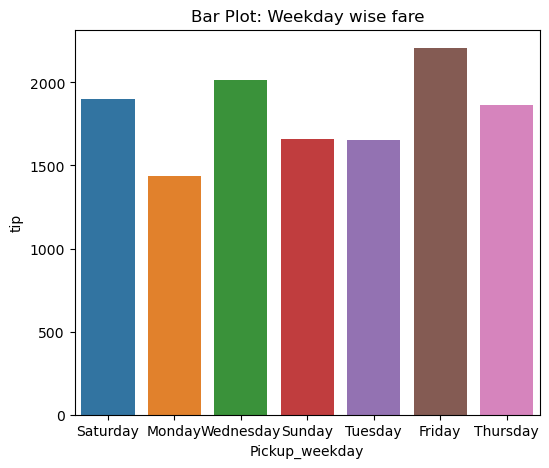

In [98]:
plt.figure(figsize=(6,5))
sns.barplot(x='Pickup_weekday', y='tip',estimator="sum", data=data,errorbar=("ci",False),hue="Pickup_weekday")
plt.title('Bar Plot: Weekday wise fare')
plt.show()

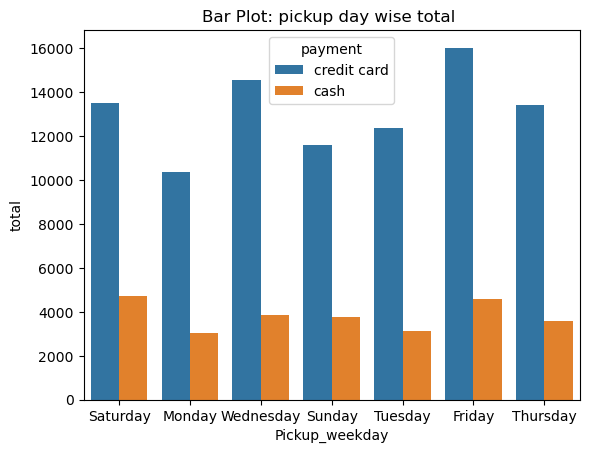

In [99]:
sns.barplot(x='Pickup_weekday', y='total',hue="payment", data=data,errorbar=("ci",False) ,estimator="sum")
plt.title('Bar Plot: pickup day wise total ')
plt.show()

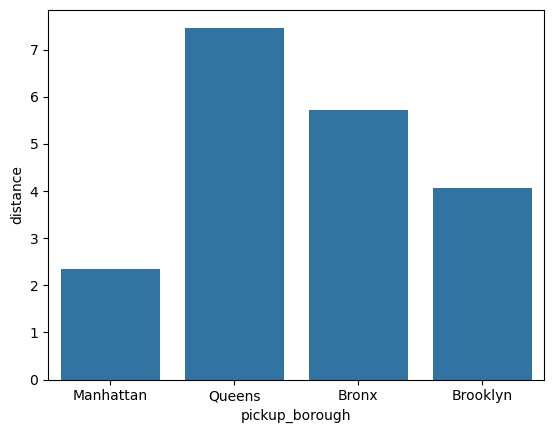

In [100]:
sns.barplot(x="pickup_borough",y="distance",data=data,errorbar=("ci",False))
plt.show()

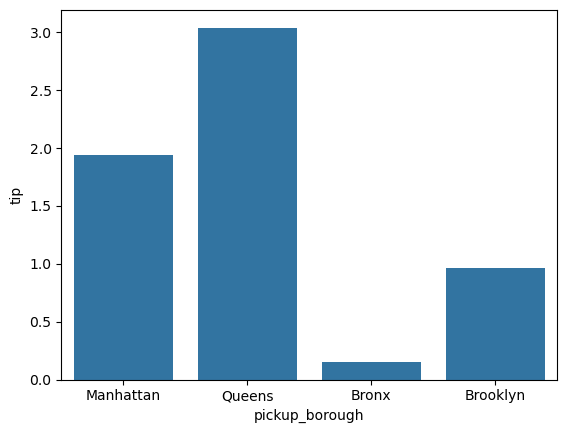

In [161]:
sns.barplot(x="pickup_borough",y="tip",data=data,errorbar=("ci",False))
plt.show()

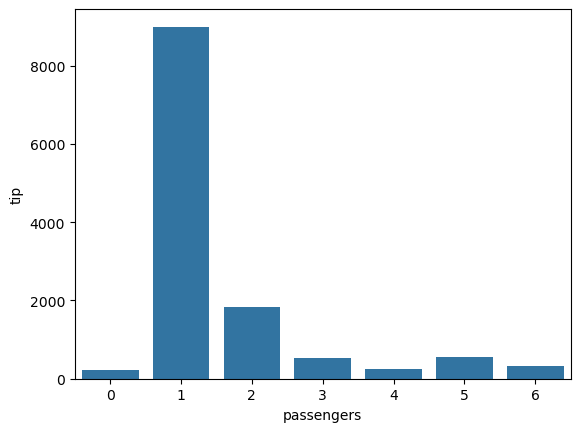

In [165]:
sns.barplot(x="passengers",y="tip",data=data,errorbar=("ci",False),estimator="sum")
plt.show()

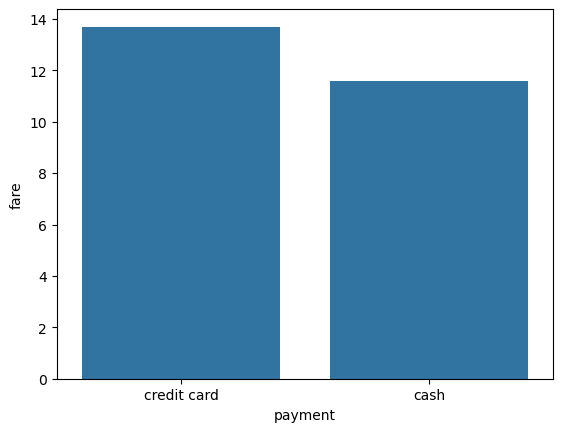

In [169]:
sns.barplot(x="payment",y="fare",data=data,errorbar=("ci",False),fill=True)
plt.show()

### 🔹 Customization Options
- `hue`: Different colors for categories
- `palette`: Custom color palettes
- `ci`: Confidence interval (set to None to remove)

In [67]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,pickup_weekday
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,4,Monday
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,27,Wednesday
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,10,Sunday
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,30,Saturday


## 4️⃣ Box Plot
**Purpose:** Used to show the distribution and detect outliers.

In [70]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,4,Monday,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,27,Wednesday,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,10,Sunday,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,30,Saturday,9.533333


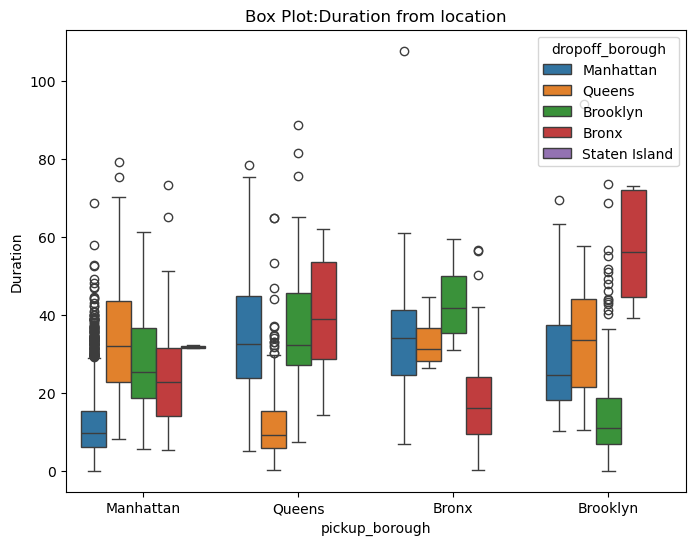

In [179]:
plt.figure(figsize=(8,6))
sns.boxplot(x='pickup_borough', y='Duration', data=data,hue="dropoff_borough")
plt.title('Box Plot:Duration from location')
plt.show()

In [175]:
data.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,Pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.25


In [ ]:
1.Weekday wise tip 
2.weekday wise duration 
3.pickup_borough wise distance

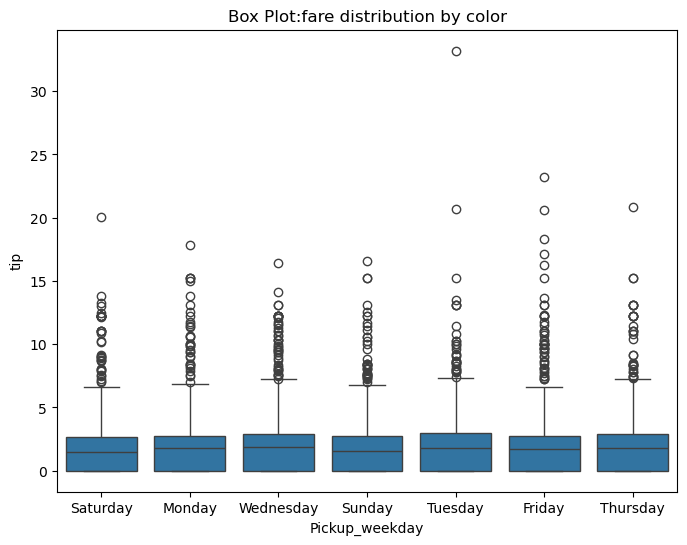

In [136]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pickup_weekday', y='tip', data=data)
plt.title('Box Plot:fare distribution by color')
plt.show()

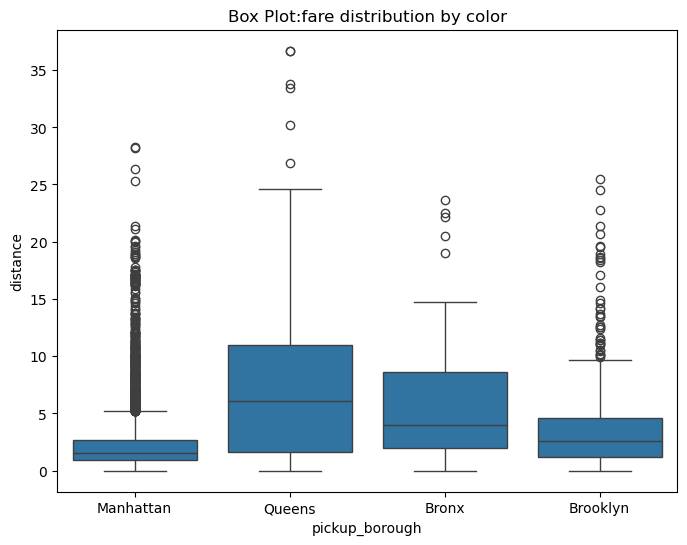

In [142]:
plt.figure(figsize=(8,6))
sns.boxplot(x='pickup_borough', y='distance', data=data)
plt.title('Box Plot:fare distribution by color')
plt.show()

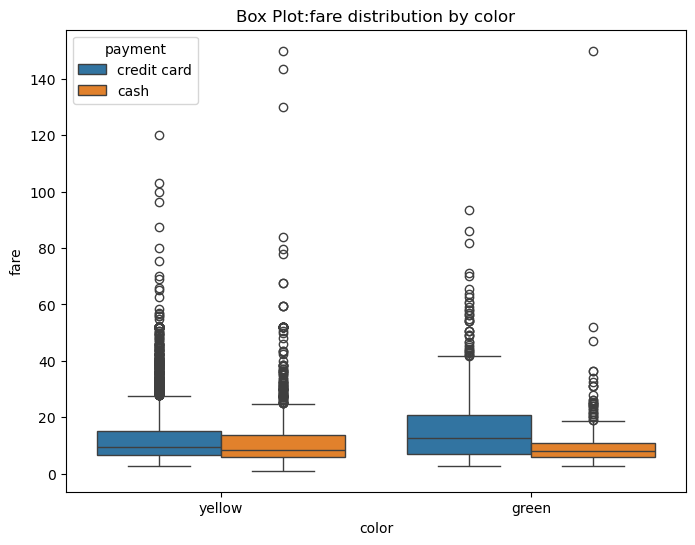

In [222]:
plt.figure(figsize=(8,6))
sns.boxplot(x='color', y='fare',hue="payment", data=data)
plt.title('Box Plot:fare distribution by color')
plt.show()

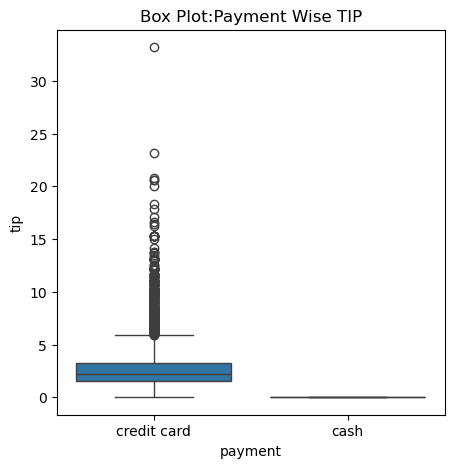

In [144]:
plt.figure(figsize=(5,5))
sns.boxplot(x='payment', y='tip', data=data)
plt.title('Box Plot:Payment Wise TIP')
plt.show()

### 🔹 Customization Options
- `hue`: Color boxes by category
- `palette`: Change color scheme
- `showfliers`: Hide outliers

In [54]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,4,Monday,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,27,Wednesday,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,10,Sunday,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,30,Saturday,9.533333


## 6️⃣ Histogram
**Purpose:** Shows the distribution of numerical data.

In [21]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,Pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,4,Monday,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,27,Wednesday,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,10,Sunday,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,30,Saturday,9.533333


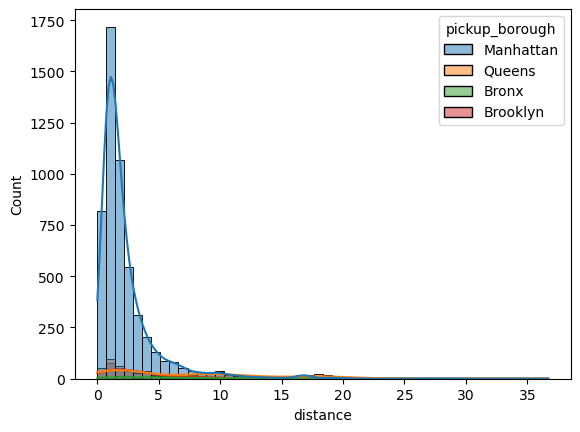

In [154]:
sns.histplot(x="distance",data=data,bins=50,kde=True,hue="pickup_borough")
plt.show()

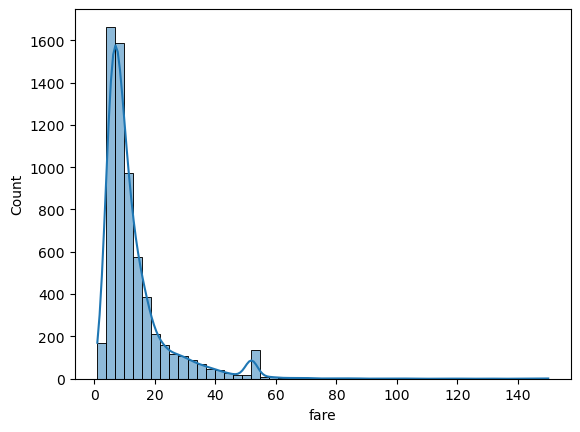

In [156]:
sns.histplot(x='fare',bins=50 , data=data,kde=True)
plt.show()

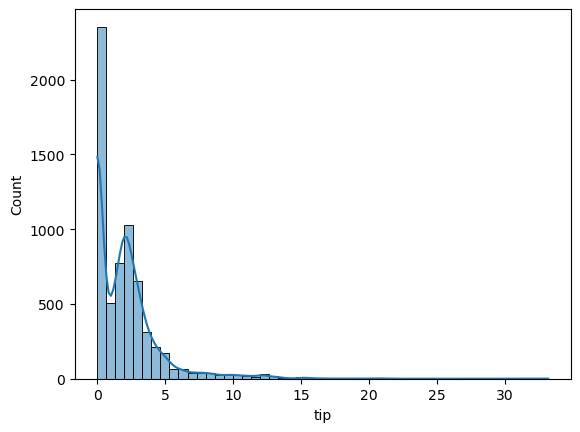

In [158]:
sns.histplot(x='tip',bins=50 , data=data,kde=True)
plt.show()

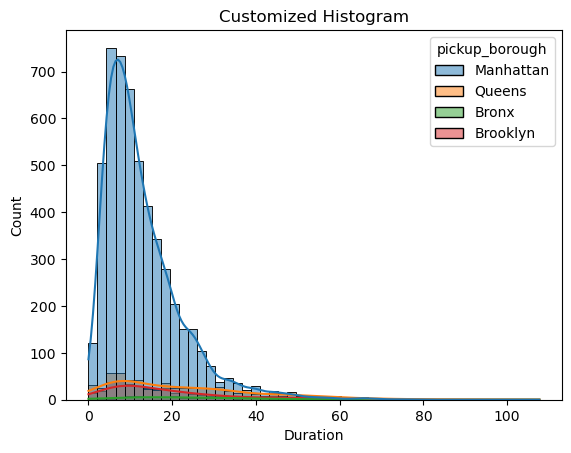

In [232]:
sns.histplot(x=data['Duration'], hue="pickup_borough",bins=50, kde=True, color='blue',data=data )
plt.title('Customized Histogram')
plt.show()

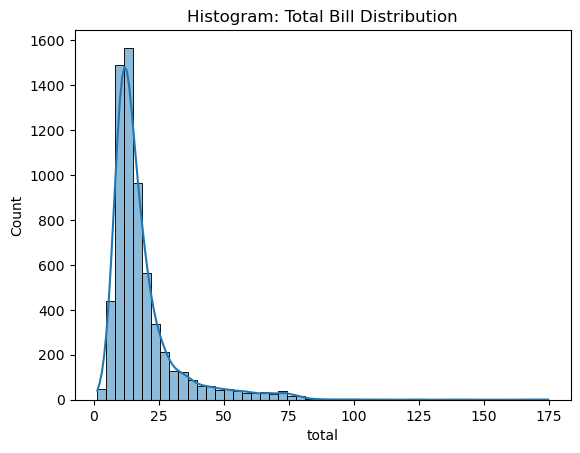

In [230]:
sns.histplot(data['total'], bins=50, kde=True)
plt.title('Histogram: Total Bill Distribution')
plt.show()

## 5️⃣ Heatmap
**Purpose:** Used to visualize correlations and matrix data.

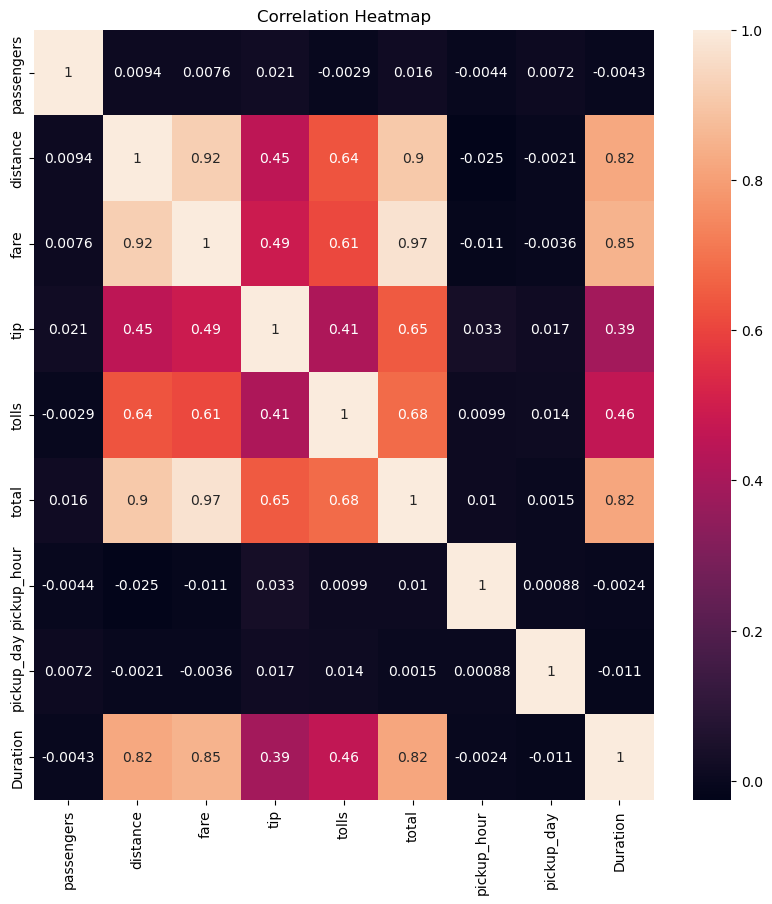

In [119]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

## 7️⃣ Violin Plot
**Purpose:** Combines box plot and KDE plot to show distribution.

In [121]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,4,Monday,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,27,Wednesday,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,10,Sunday,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,30,Saturday,9.533333


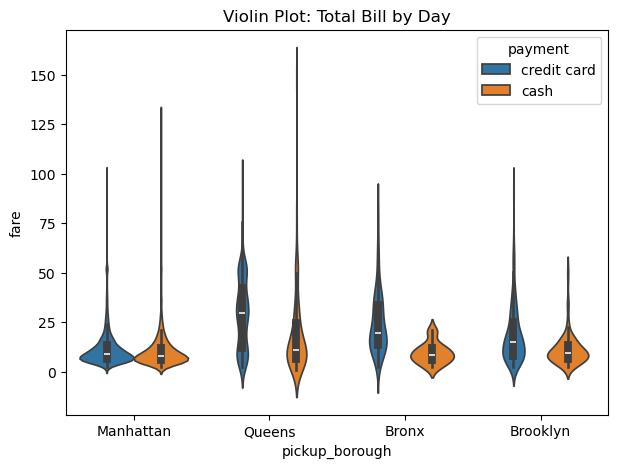

In [168]:
plt.figure(figsize=(7,5))

sns.violinplot(x='pickup_borough', y='fare',hue='payment', data=data)
plt.title('Violin Plot: Total Bill by Day')
plt.show()

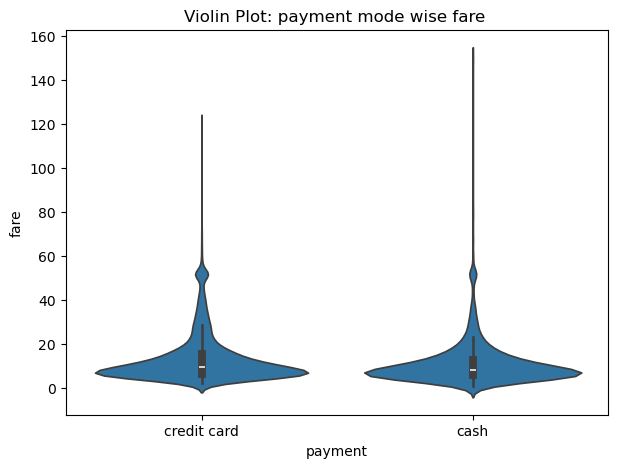

In [166]:
plt.figure(figsize=(7,5))

sns.violinplot(x='payment', y='fare',  data=data)
plt.title('Violin Plot: payment mode wise fare ')
plt.show()

### 🔹 Customization Options
- `hue`: Color by category
- `split`: Split the violin into multiple categories
- `palette`: Change color scheme

## 8️⃣ Count Plot
**Purpose:** Shows the count of observations in categorical data.

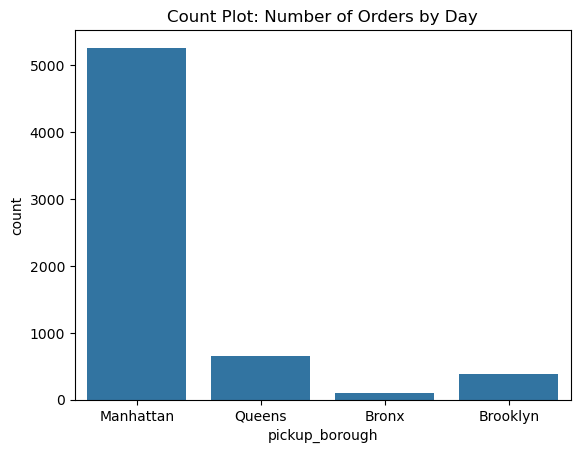

In [163]:
sns.countplot(x='pickup_borough', data=data)
plt.title('Count Plot: Number of Orders by Day')
plt.show()

In [174]:
data['payment'].value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

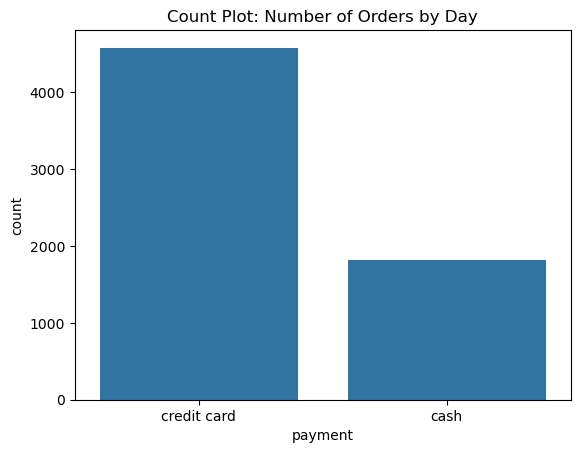

In [170]:
sns.countplot(x='payment', data=data)
plt.title('Count Plot: Number of Orders by Day')
plt.show()

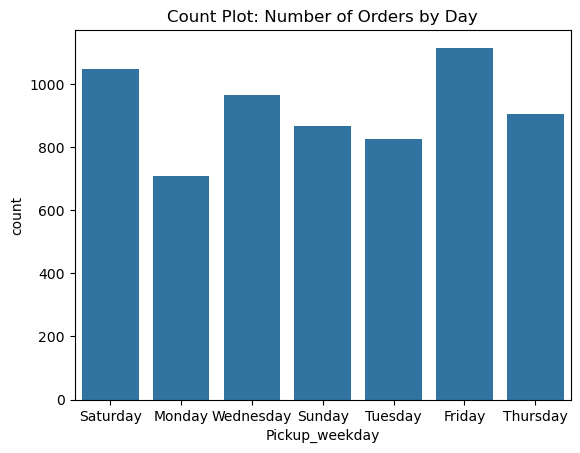

In [176]:
sns.countplot(x='Pickup_weekday', data=data)
plt.title('Count Plot: Number of Orders by Day')
plt.show()

In [173]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,4,Monday,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,27,Wednesday,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,10,Sunday,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,30,Saturday,9.533333


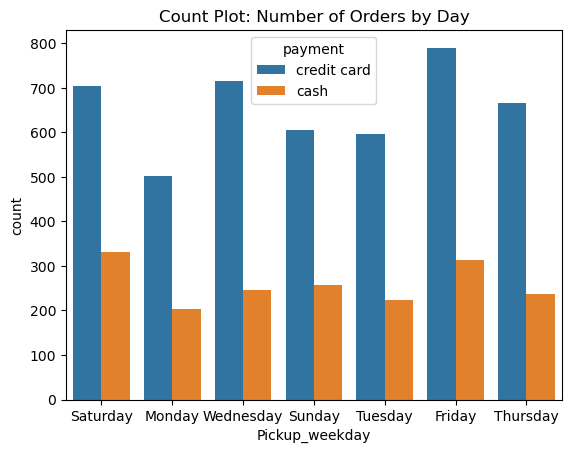

In [28]:
sns.countplot(x='Pickup_weekday',hue='payment', data=data)
plt.title('Count Plot: Number of Orders by Day')
plt.show()

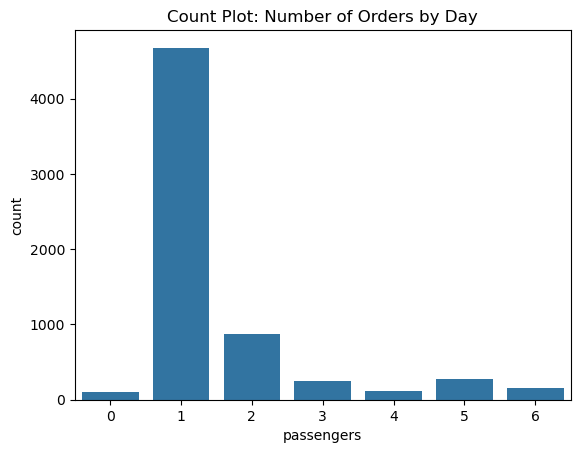

In [32]:

sns.countplot(x='passengers', data=data)
plt.title('Count Plot: Number of Orders by Day')
plt.show()

C:\Users\Mukesh\AppData\Local\Temp\ipykernel_13936\3861546518.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='pickup_weekday',y="total",hue="payment", data=data,ci=False)


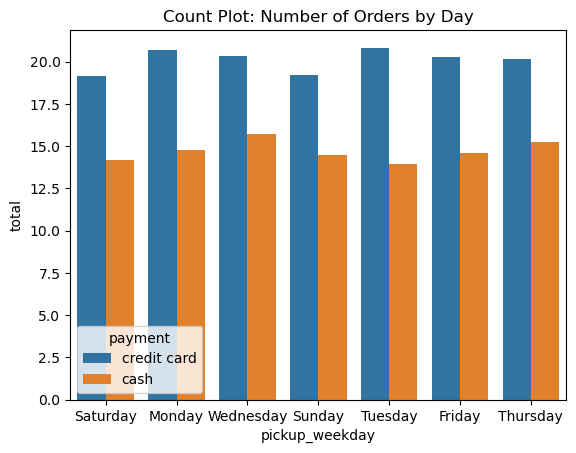

In [185]:

sns.barplot(x='pickup_weekday',y="total",hue="payment", data=data,ci=False)
plt.title('Count Plot: Number of Orders by Day')
plt.show()

### 🔹 Customization Options
- hue: Group counts by another category
- palette: Change color scheme

### 10. KDE Plot (Kernel Density Estimate)
- Purpose: KDE plots show the probability density function of a continuous variable, providing a smooth estimate of the data distribution. It's like a smoothed-out histogram.

In [36]:
data.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_day,Pickup_weekday,Duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,Saturday,6.25


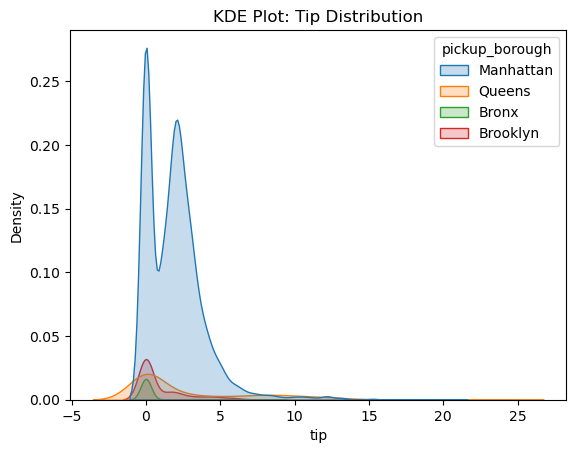

In [186]:
# Create KDE plot for total_bill
sns.kdeplot(x='tip',data=data, fill=True,hue="pickup_borough")

# Add title
plt.title("KDE Plot: Tip Distribution")

# Show plot
plt.show()

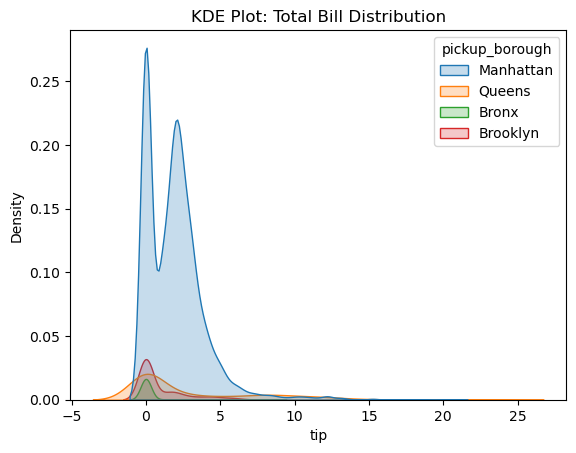

In [44]:
# Create KDE plot for total_bill
sns.kdeplot(x='tip',data=data, fill=True,hue = "pickup_borough")

# Add title
plt.title("KDE Plot: Total Bill Distribution")

# Show plot
plt.show()

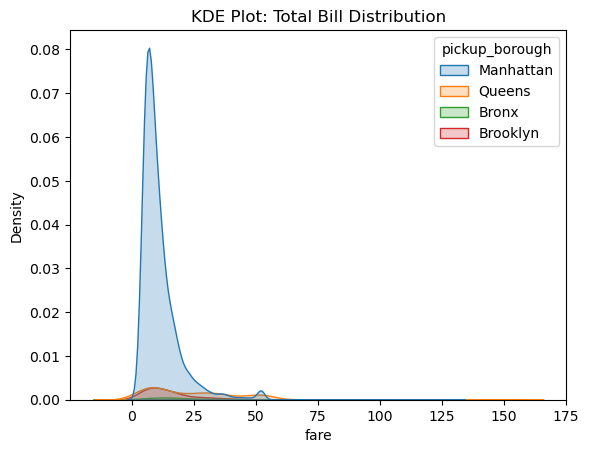

In [46]:
# Create KDE plot for total_bill
sns.kdeplot(x='fare',data=data, fill=True,hue = "pickup_borough")

# Add title
plt.title("KDE Plot: Total Bill Distribution")

# Show plot
plt.show()

### Customization Options:
- shade=True: Fills the area under the curve
- bw_adjust=: Adjusts the bandwidth for smoothness
- hue=: Color by category
- multiple="stack": Stacks multiple KDEs